In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PROCESSED = Path("../data/processed")
OUT = Path("../outputs")
OUT.mkdir(parents=True, exist_ok=True)

# Cargar datasets
top_products = pd.read_csv(PROCESSED / "top_products.csv")
orders_by_dow = pd.read_csv(PROCESSED / "orders_by_dow.csv")
orders_by_hour = pd.read_csv(PROCESSED / "orders_by_hour.csv")
heat = pd.read_csv(PROCESSED / "dow_x_hour.csv")

top_products.head()


,product_name,units_sold,orders_count
0,Organic Bananas,15,6
1,Pasta Penne,7,3
2,Whole Milk,6,4
3,Strawberries,5,3
4,Avocado Hass,4,3


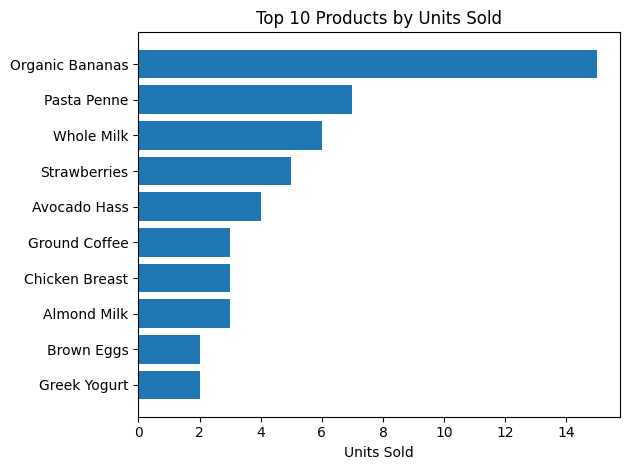

In [6]:
metric = "units_sold" if "units_sold" in top_products.columns else "times_ordered"

df_tp = top_products.sort_values(metric, ascending=True)

plt.figure()
plt.barh(df_tp["product_name"], df_tp[metric])
plt.title(f"Top 10 Products by {metric.replace('_',' ').title()}")
plt.xlabel(metric.replace("_"," ").title())
plt.tight_layout()
plt.savefig(OUT / "top_products.png", dpi=200)
plt.show()


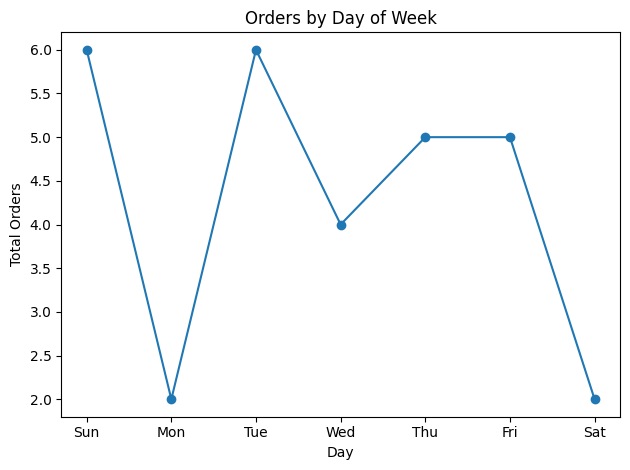

In [3]:
xcol = "dow_name" if "dow_name" in orders_by_dow.columns else "order_dow"

plt.figure()
plt.plot(orders_by_dow[xcol], orders_by_dow["total_orders"], marker="o")
plt.title("Orders by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.savefig(OUT / "orders_by_dow.png", dpi=200)
plt.show()


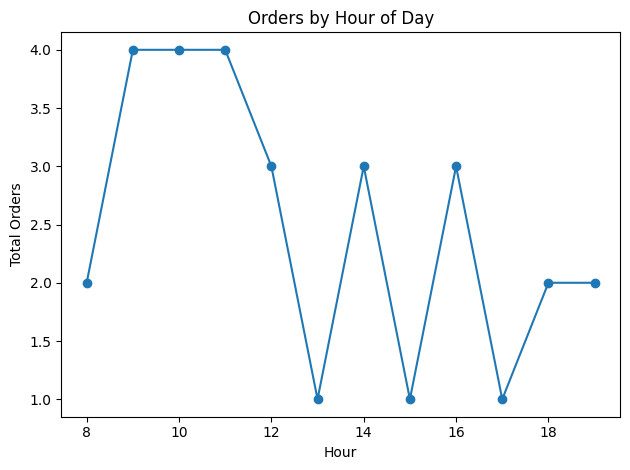

In [8]:
plt.figure()
plt.plot(orders_by_hour["order_hour"], orders_by_hour["total_orders"], marker="o")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.savefig(OUT / "orders_by_hour.png", dpi=200)
plt.show()

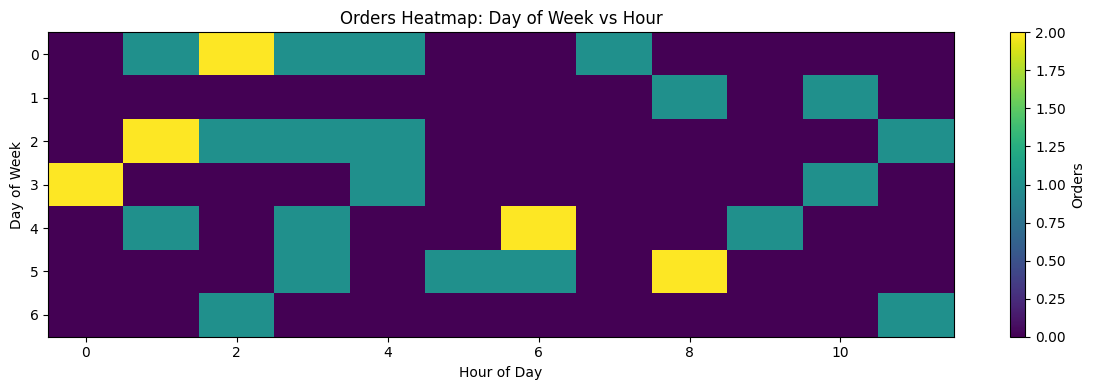

In [11]:
pivot = (
    heat.pivot(index="order_dow", columns="order_hour", values="total_orders")
    .fillna(0)
)

plt.figure(figsize=(12, 4))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Orders")
plt.title("Orders Heatmap: Day of Week vs Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.savefig(OUT / "dow_hour_heatmap.png", dpi=200)
plt.show()